<a href="https://colab.research.google.com/github/leeyeonho1001/DL/blob/main/MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [4]:
# GPU 환경 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [11]:
# train_data 와 test_data 불러오기
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [13]:
# train_data 를 batch 단위로 로드하기
loader = DataLoader(dataset = train_data,
                    batch_size = 64,
                    shuffle = True)

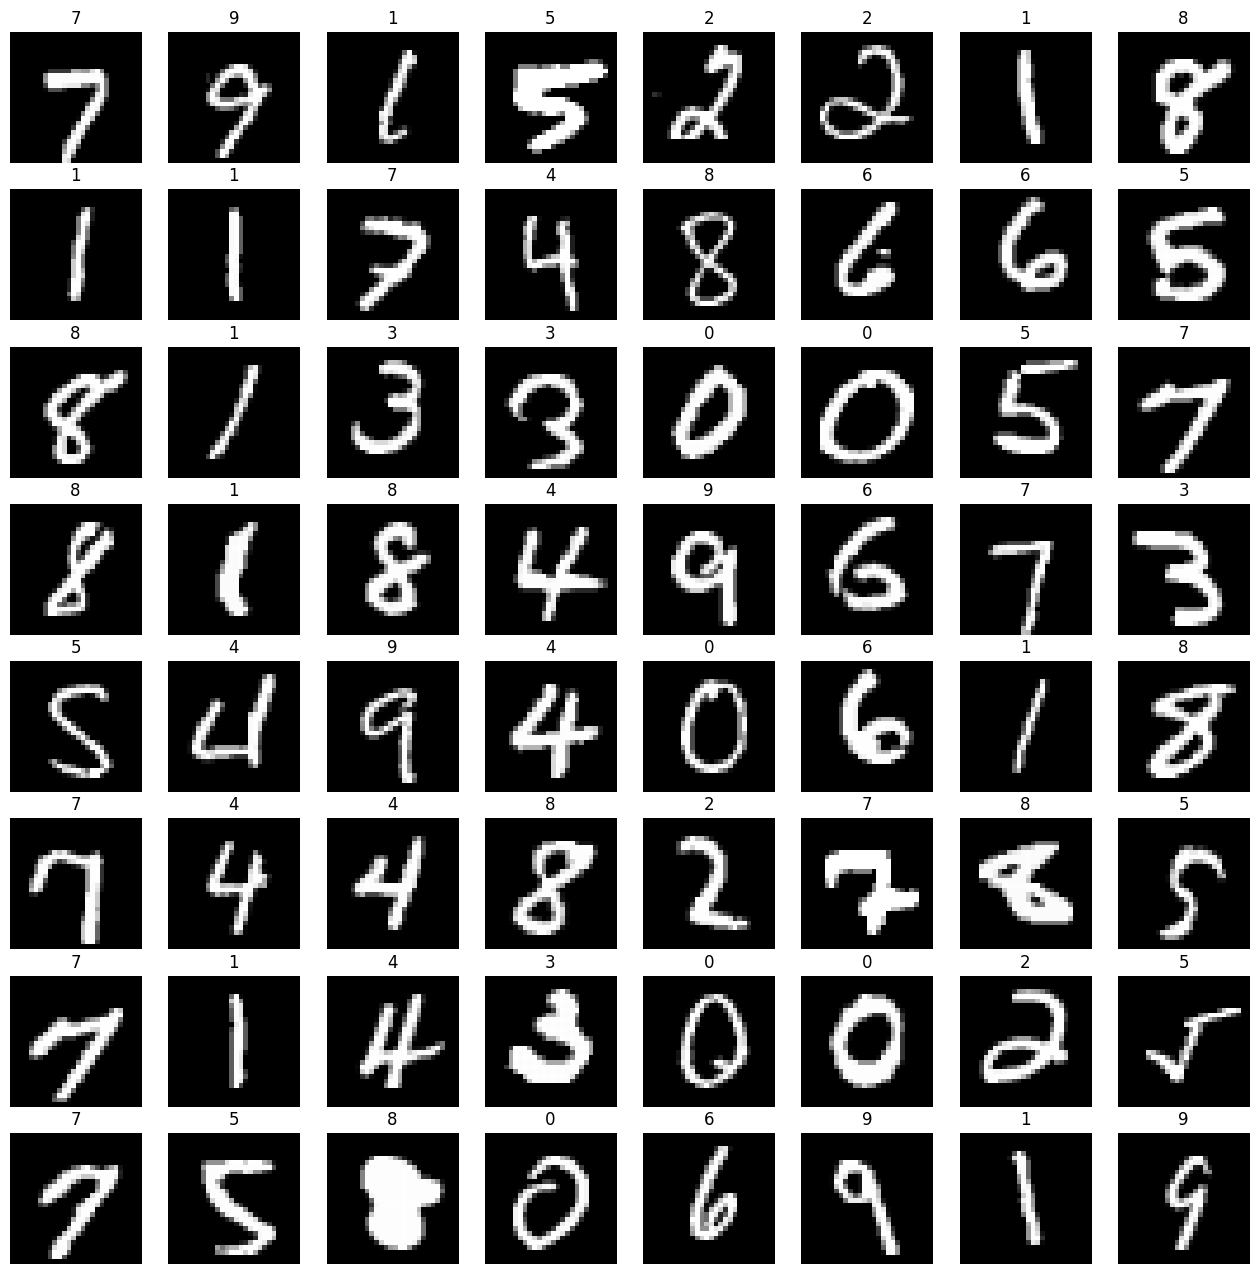

In [14]:
# train_data 시각화
imgs, labels = next(iter(loader))

fig, axes = plt.subplots(8,8, figsize = (16,16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
  ax.imshow(img.reshape(28,28), cmap = 'gray')
  ax.set_title(label.item())
  ax.axis('off')

In [48]:
# CNN 모델 생성
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size = 3, padding = 'same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2),
    nn.Conv2d(32, 64, kernel_size = 3, padding = 'same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2),
    nn.Flatten(),
    nn.Linear(7*7*64, 10)
).to(device)
print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=10, bias=True)
)


In [53]:
# 모델 훈련
optimizer = optim.Adam(model.parameters(), lr = 0.001)
epochs = 10

for epoch in range(epochs + 1):
  sum_losses = 0
  sum_accs = 0
  for x_batch, y_batch in loader:
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)
    y_pred = model(x_batch)

    loss = nn.CrossEntropyLoss()(y_pred, y_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    sum_losses = sum_losses + loss.item()
    y_prob = nn.Softmax(1)(y_pred)
    y_pred_index = torch.argmax(y_prob, axis = 1)
    acc = (y_batch == y_pred_index).float().sum()/len(y_batch) * 100

    sum_accs = sum_accs + acc

  avg_loss = sum_losses/len(loader)
  avg_acc = sum_accs/len(loader)

  print(f'Epoch:{epoch+1:4d}/{epochs} Loss:{avg_loss:6f} Accuracy:{avg_acc:2f}%')

Epoch:   1/10 Loss:0.175556 Accuracy:94.799438%
Epoch:   2/10 Loss:0.055142 Accuracy:98.319229%
Epoch:   3/10 Loss:0.039075 Accuracy:98.825623%
Epoch:   4/10 Loss:0.032296 Accuracy:98.993874%
Epoch:   5/10 Loss:0.026661 Accuracy:99.162117%
Epoch:   6/10 Loss:0.020571 Accuracy:99.335358%
Epoch:   7/10 Loss:0.017288 Accuracy:99.443626%
Epoch:   8/10 Loss:0.014580 Accuracy:99.553574%
Epoch:   9/10 Loss:0.011786 Accuracy:99.621872%
Epoch:  10/10 Loss:0.010472 Accuracy:99.671844%
Epoch:  11/10 Loss:0.008451 Accuracy:99.736809%


In [54]:
# test_data를 batch 단위로 로드하기
test_loader = DataLoader(dataset=test_data,
                         batch_size = 64,
                         shuffle = True)

In [55]:
# 모델 성능 평가
model.eval()
sum_accs = 0
for x_batch, y_batch in test_loader:
  x_batch = x_batch.to(device)
  y_batch = y_batch.to(device)
  y_pred = model(x_batch)
  y_prob = nn.Softmax(1)(y_pred)
  y_pred_index = torch.argmax(y_prob, axis = 1)
  acc = (y_batch == y_pred_index).float().sum()/len(y_batch) *100
  sum_accs = sum_accs + acc

avg_loss = sum_losses/len(test_loader)
avg_acc = sum_accs/len(test_loader)

print(f'Accuracy of test is {avg_acc:.2f}%')
################################################################################

Accuracy of test is 98.96%


In [56]:
# Tensorflow.keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# 데이터셋 불러오기
mnist = datasets.mnist
# X_train, y_train, X_test, y_test 정의
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [40]:
# CNN 모델 생성
model = models.Sequential([
    layers.Conv2D(32, kernel_size = 5, strides = (1,1), padding = 'same', activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    layers.Conv2D(64, kernel_size = 2, activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_6 (Flatten)         (None, 3136)             

In [41]:
# 모델 컴파일 및 훈련
import time
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose = 1, validation_data = (X_test,y_test))
print(f'Fit Time :{time.time() - start_time}')

Epoch 1/5
1875/1875 [==============================] - 187s 99ms/step - loss: 0.1142 - accuracy: 0.9643 - val_loss: 0.0476 - val_accuracy: 0.9853
Epoch 2/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0448 - accuracy: 0.9855 - val_loss: 0.0403 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 271s 145ms/step - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.0258 - val_accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 277s 148ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0262 - val_accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0276 - val_accuracy: 0.9911
Fit Time :1164.9265940189362


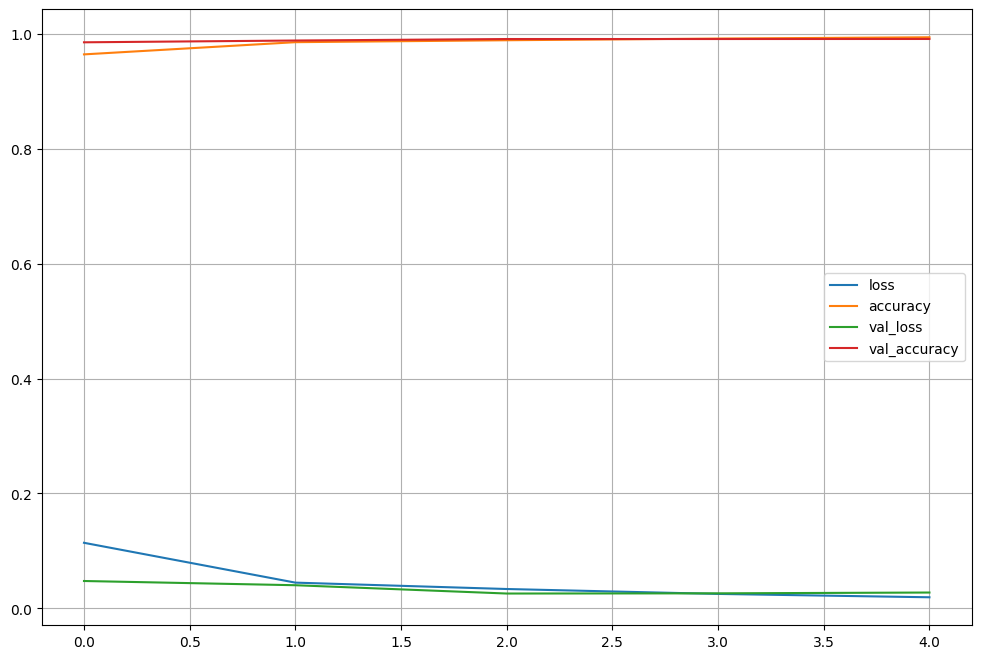

In [42]:
# 시각화
plot_target = ['loss','accuracy','val_loss','val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
  plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [43]:
# 모델 평가
score = model.evaluate(X_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy : {score[1]}')

313/313 [==============================] - 8s 24ms/step - loss: 0.0276 - accuracy: 0.9911
Test Loss : 0.02757253497838974
Test Accuracy : 0.991100013256073


In [44]:
# 데이터 예측
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10]

313/313 [==============================] - 8s 24ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [45]:
# 틀린 예측의 개수
wrong_result = []
for i in range(0, len(y_test)):
  if predicted_labels[i] != y_test[i]:
    wrong_result.append(i)

len(wrong_result)

89

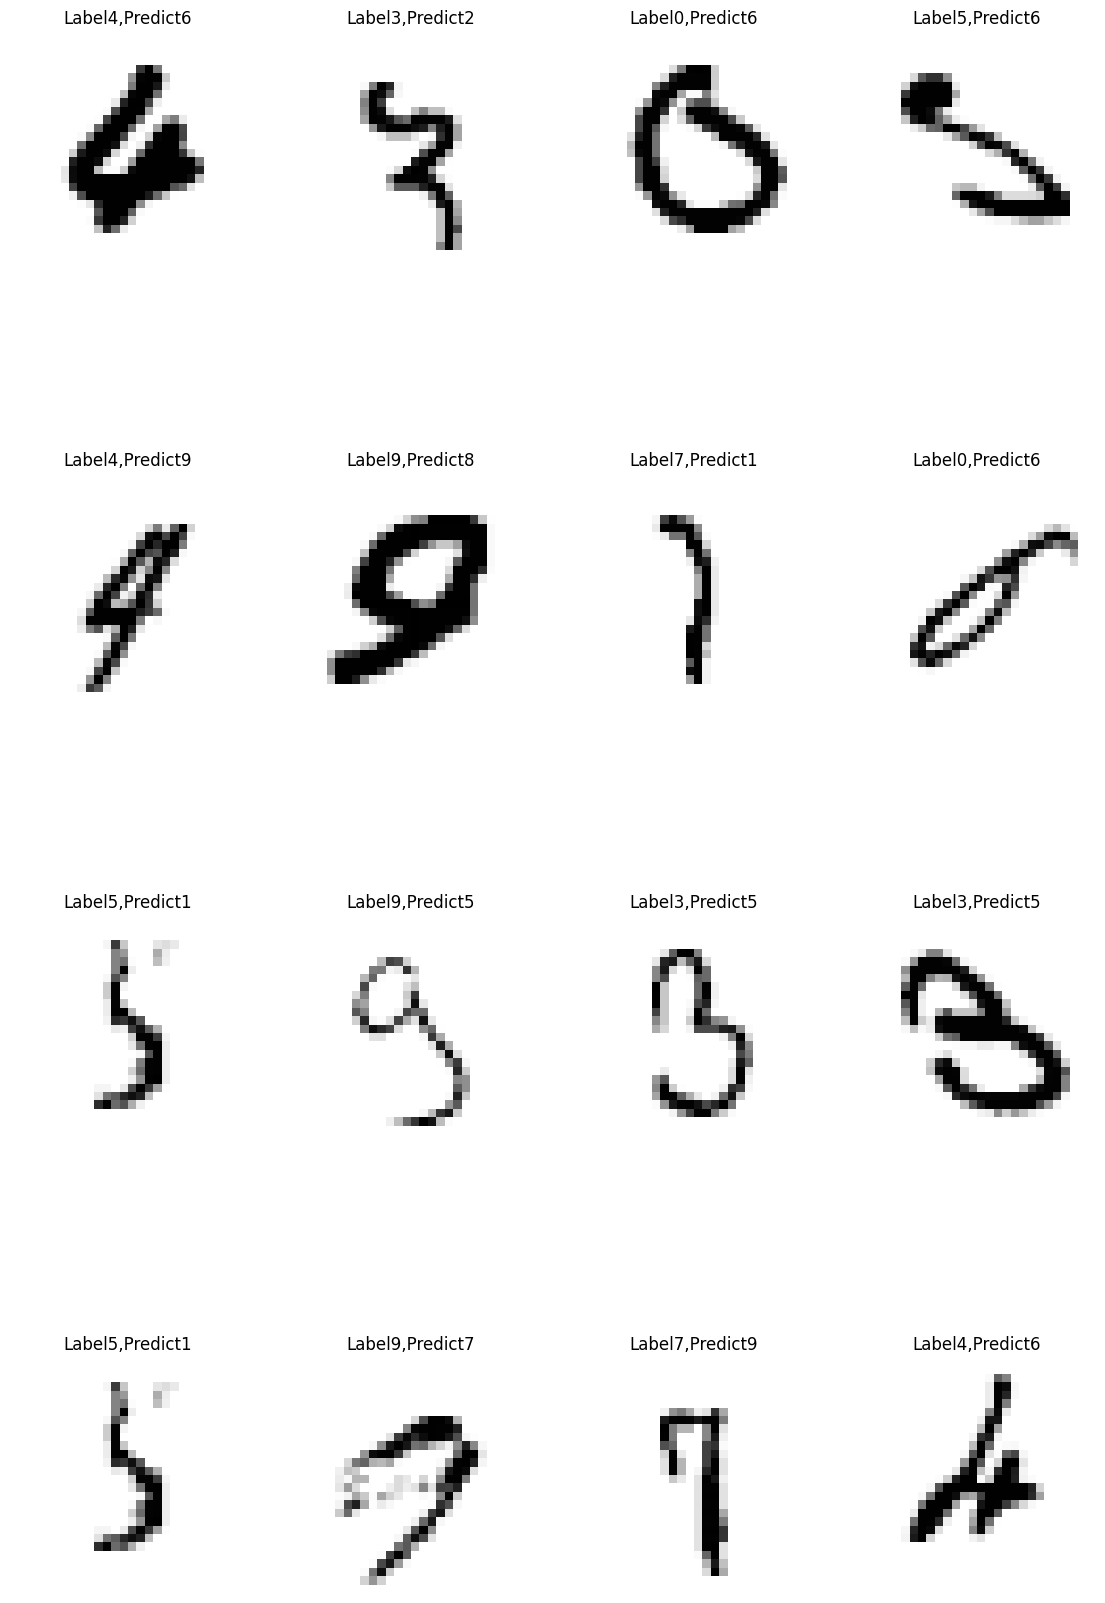

In [47]:
# 틀린 예측 예시
samples = random.choices(wrong_result, k = 16)
plt.figure(figsize=(14,22))
for idx, n in enumerate(samples):
  plt.subplot(4,4,idx +1)
  plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation = 'nearest')
  plt.title('Label'+str(y_test[n])+',Predict'+str(predicted_labels[n]))
  plt.axis('off')

plt.show()